# Module 3 - Exploratory Data Analysis

Materia: Ciencia y Analítica de Datos
<br>
Alumno: Ricardo Morales Bustillos
<br>
Matrícula: A017400321

### Descriptive Statistics

In [17]:
# they help understand better the data before doing a more complex analysis

import pandas as pd
import numpy as np
import seaborn as sns

<AxesSubplot: xlabel='Age'>

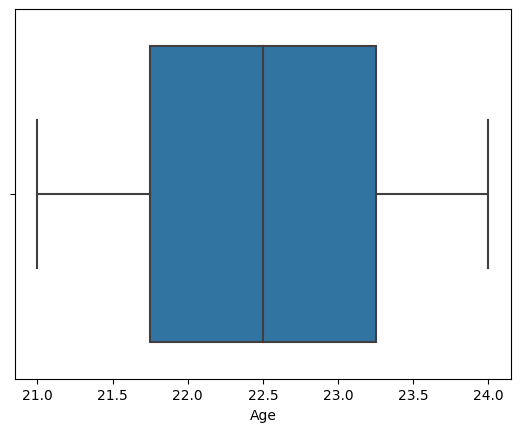

In [18]:
data={'Name':['Karan','Rohit','Juan','Sahil','Aryan'],'Age':[23,22,np.nan,21,24], 'Height':[178, 162, 182, 158, 166]}
df=pd.DataFrame(data)

df.describe() # a brief statistical description of data 
df.value_counts()
sns.boxplot(x = 'Age', data = df) # helps with distributions and to identify outliers


### GroupBy

In [19]:
''' Commented to avoid error
df_test = df[['drive-wheels', 'body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index = False).mean()
df_grp

# pivots to better visualize the data
df_pivot = df_grp.pivot(index= 'drive-wheels', columns='body-style')

# heatmaps to plot and visualize the correlation between variables
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()
'''


" Commented to avoid error\ndf_test = df[['drive-wheels', 'body-style','price']]\ndf_grp = df_test.groupby(['drive-wheels','body-style'], as_index = False).mean()\ndf_grp\n\n# pivots to better visualize the data\ndf_pivot = df_grp.pivot(index= 'drive-wheels', columns='body-style')\n\n# heatmaps to plot and visualize the correlation between variables\nplt.pcolor(df_pivot, cmap='RdBu')\nplt.colorbar()\nplt.show()\n"

### ANOVA Analisis of Variance

In [20]:
# Why? To find the correlation of different group of categorigal variables
# What we obtain? 
#   - F-test score: variation between sample group means divided by variation
#     within sample group
#   - p-value: confidence degree


# anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])


### Correlation

<AxesSubplot: xlabel='Age', ylabel='Height'>

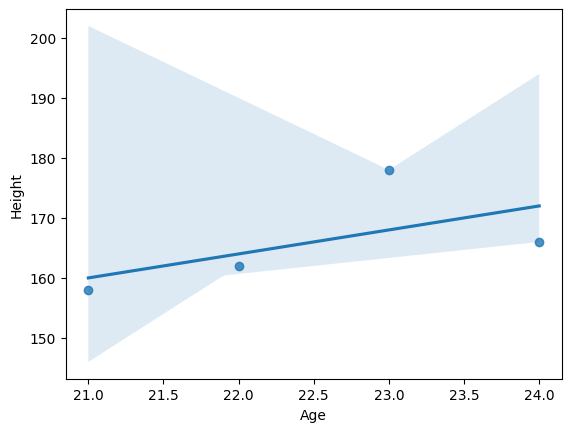

In [21]:
# It shows the dependence of one variable in another
sns.regplot(x = 'Age', y = 'Height', data=df)

Correlation coefficient
* Close to +1: Large positive relationship
* Close to -1: Large negative relationship
* Close to 0: No relationship
<br>

P-value
* < 0.001 Strong certainty in the results
* < 0.05  Moderate certainty in the resutls
* < 0.1   Weak certainty in the resutls
* \> 0.1   No certainty in the resutls

### LAB

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats

In [23]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

float64


,price,body-style
0,5118.0,hatchback
1,5151.0,hatchback
2,5195.0,hatchback
3,5348.0,hatchback
4,5389.0,hatchback
...,...,...
186,36880.0,sedan
187,37028.0,convertible
188,40960.0,sedan
189,41315.0,sedan


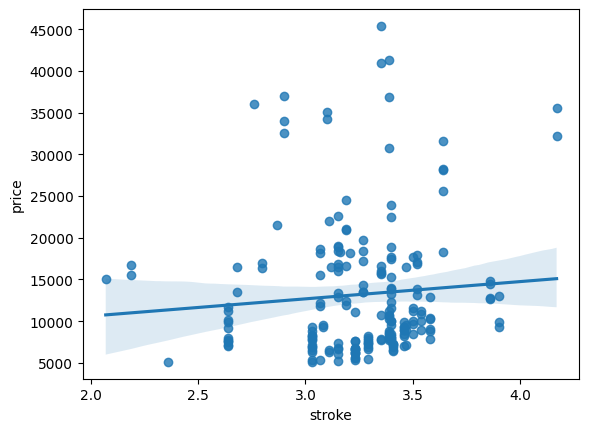

In [33]:
## EXERCISES

# QUESTION 1
print(df['peak-rpm'].dtypes)

# QUESTION 2
df[['bore','stroke','compression-ratio','horsepower']].corr()

# QUESTION 3 & 4
df[["stroke","price"]].corr()
sns.regplot(x = "stroke",y = "price", data = df)

# QUESTION 5
df_group1 = df[['body-style','price']]
group1 = df_group1.groupby(['price','body-style'],as_index=False).mean()
group1

(0.0, 53216.554111004385)

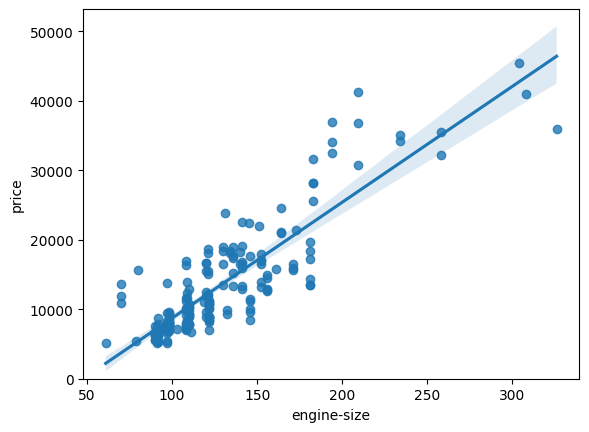

In [26]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [27]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

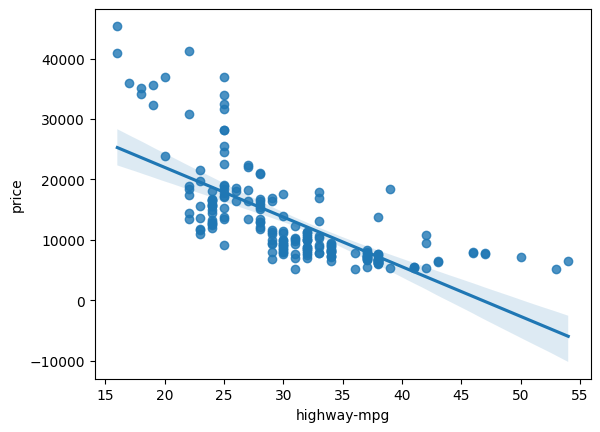

In [28]:
sns.regplot(x="highway-mpg", y="price", data=df)
# aquí, tanto por la tabla de correlación como con la gráfica se puede observar fácilmente la 
# relación entre ambas variables

<AxesSubplot: xlabel='body-style', ylabel='price'>

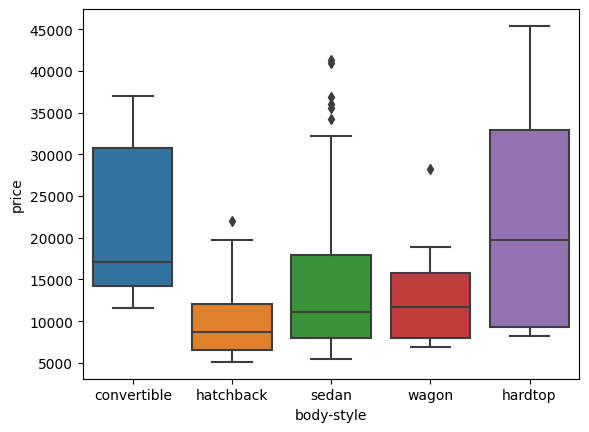

In [30]:
sns.boxplot(x="body-style", y="price", data=df)

In [31]:
## DESCRIPTIVE ANALYSIS
df.describe()
df.describe(include=['object']) # limiting the variables

df['drive-wheels'].value_counts() # value counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [35]:
## GROUPING
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\Ricardo Morales\AppData\Local\Temp\ipykernel_29836\544533106.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [37]:
## CORRELATION AND CAUSATION

df.corr()

C:\Users\Ricardo Morales\AppData\Local\Temp\ipykernel_29836\3644580623.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [39]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [40]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

# Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).


The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


In [41]:
## ANOVA
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [42]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [43]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23
